# LAB 1: Dataset Selection 


As a group, we discussed three datasets that we found interesting. Given below are the datasets:
1.	Star Classification: This dataset classifies stars into six class types
2.	Mobile Price Prediction: This dataset classifies the mobile prices into 3 ranges(low, high, very high).
3.	Car Price Prediction: This dataset predicts the price of cars

We discussed the pros and cons for each dataset, and also checked with our Lab Tutor Professor Ali. Some notes from our discussion:

	Star Classification was an interesting and unique dataset, but only had 6 attributes. This was not enough to perform feature selection with and derive new conclusions. We rejected this dataset for this reason.

	Car Price prediction had a good number of attributes (26 columns), however most of these columns were information that we could not use or was not clearly described. We realized that there was a lack of quality in the data. There was also the issue of the prices being continuous variables, and not a classification, this would require us to clean and transform the data. Transforming the data to price ranges for the purpose of classification would result in the data being biased to the range we have chosen. Therefore, this dataset was rejected.

	In the end, mobile price prediction was the chosen dataset for our coursework. It had a good amount of attributes (22 Columns), clear attribute descriptions, a price range for low, high and very high costs. The number of columns was a good quantity to perform feature selection and derive new conclusions. Mobiles are also a technological device that we are well versed in, and therefore it was an interesting topic for us. Thus, this was the final dataset chosen.

We decided to choose two datasets, one which was image based and one numerical and data focused. For the image dataset, we chose face mask detection. This dataset classifies whether a person is wearing a mask, not wearing a mask, or wearing it incorrectly

The links to the two final chosen datasets:
1.	Mobile price prediction: https://www.kaggle.com/code/vikramb/mobile-price-prediction
2.	Face-mask detection: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection


# General Setup 

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
np.random.seed(42)
import csv


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# LAB 2 : Visualization and Initial Data Exploration

Tasks Done: Dataset was loaded onto the jupyter notebook, and code from tutorial 1 was 
run. We created visualizations for our data and analyzed the correlations. 

Data preprocessing and normalization:

- No anomalies were detected in dataset
- No missing data/null values found

Therefore, no normalization of data was required.  

Experiments were done with combining features (We created a new feature Screen Size by combining the screen wifth and height features)

Histograms and Scatterplots were created for the different features.

Correlation was checked for the different features.

In [5]:
#loading the dataset
dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

In [6]:
#print the header rows (first 5 rows)
dataset.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
#the shape of the dataset the number of rows and columns
dataset.shape 

(2000, 21)

In [8]:
#intialise variable mobile to store the dataset
mobile=dataset 

In [9]:
#basic info abt the dataset to check if there are any null values
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#This method shows a statistical summary of the numerical attributes 
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


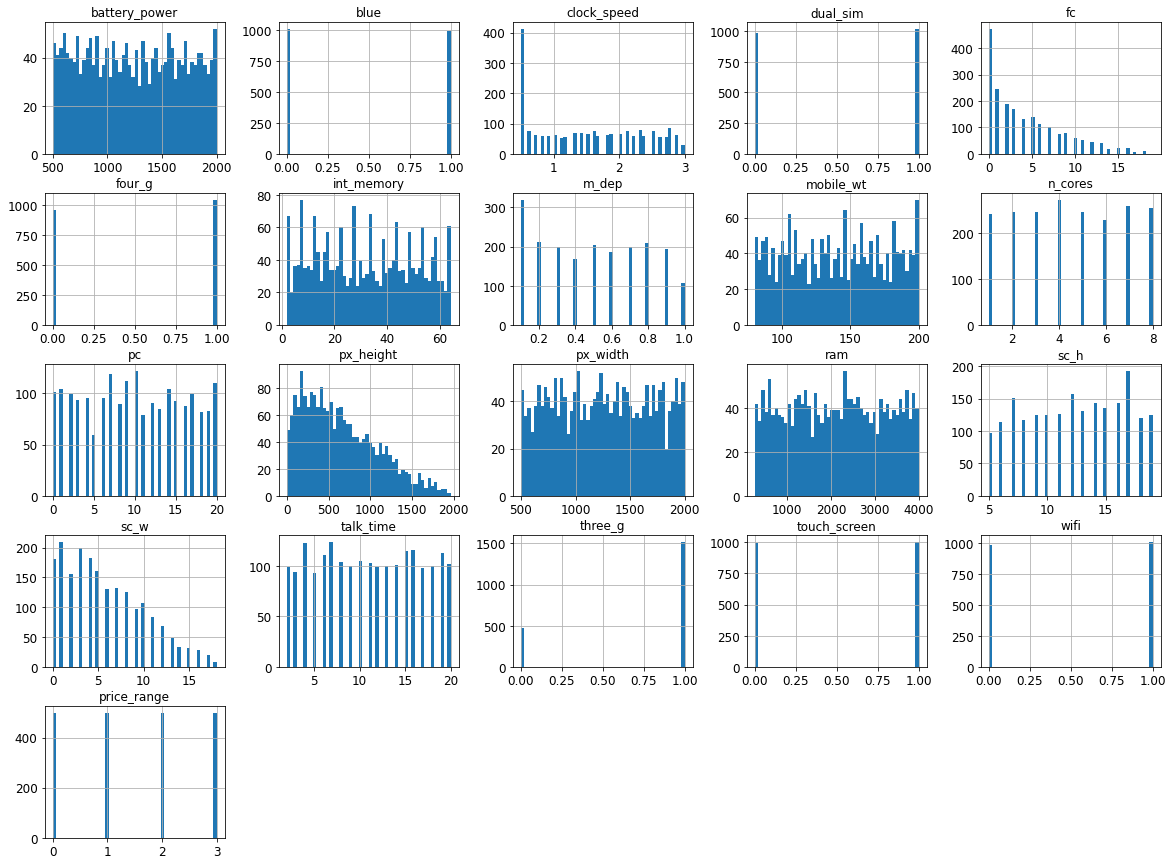

In [11]:
#To plot a histogram for each numerical attribute
mobile.hist(bins=50, figsize=(20,15)) 
plt.show()

In [12]:
# Correlation of all the attributes with the expected class attribute 
corr_matrix = mobile.corr() 

In [13]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [14]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_width'>,
        <AxesSubplot:xlabel='ram', ylabel='px_width'>,
        <AxesSubplot:xlabel='battery_power', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>]], dtype=objec

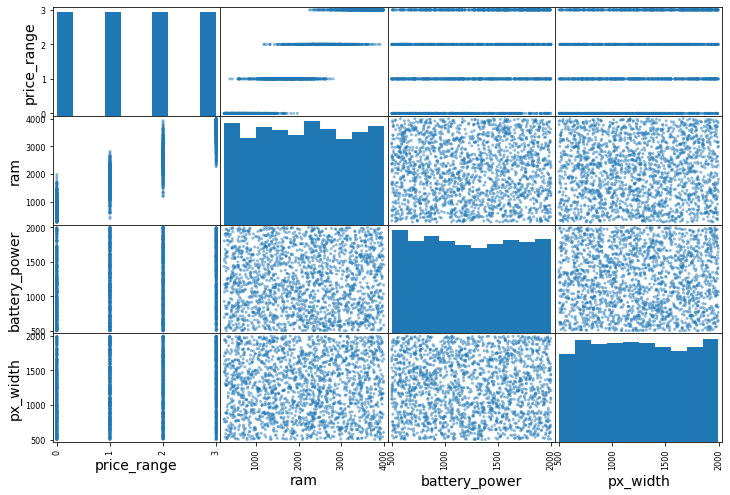

In [15]:
attributes = ["price_range", "ram", "battery_power",
              "px_width"]
scatter_matrix(mobile[attributes], figsize=(12, 8))

(0.0, 3998.0, 0.0, 4.0)

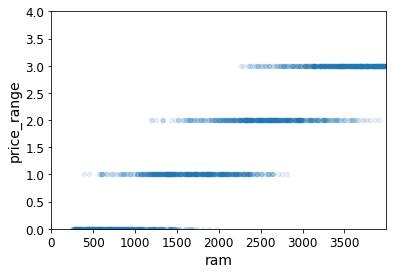

In [16]:
mobile.plot(kind="scatter", x="ram", y="price_range",
             alpha=0.1)
plt.axis([0, 3998, 0, 4])


In [17]:
# experimenting by combining features
mobile["screensize"]=mobile["px_height"]*mobile["px_width"]

<AxesSubplot:xlabel='screensize', ylabel='price_range'>

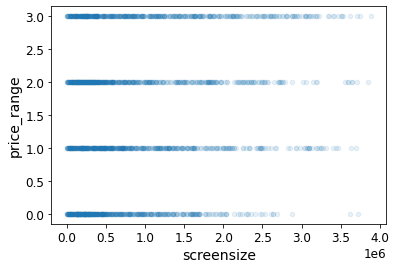

In [18]:
mobile.plot(kind="scatter", x="screensize", y="price_range",
             alpha=0.1)

# Lab 3: Feature Selection

We decided to convert the dataset to suit a binary classifier. The original dataset had 4 classes - 0,1,2,3 for the different mobile price ranges. We have grouped together 0,1 and 2,3 to have two final classes 0 and 1 (0-low price, 1-high price).

We created three different datasets (DF3, DF5, DF7) to test out the different feature selection combinations. 

DF3 - The 3 most correlating features (Ram, Battery Power and Px Width)

DF5 - The 5 most correlating features (Ram, Battery Power, Px width, Px Height, Touchscreen)

DF7 - The 7 most correlating features (Ram, Battery Power, Px width, Px Height, Touchscreen, Screen width, N cores)

We ran the Decision Tree classifier on the original dataset as well as DF3, DF5 and DF7.


In [19]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#checking for most correlating features to class 1

corr_matrix = df.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
sc_w             0.035359
n_cores          0.031260
pc               0.027628
three_g          0.024638
fc               0.022464
int_memory       0.022132
wifi             0.014001
blue             0.014001
sc_h             0.009140
dual_sim         0.009002
talk_time        0.004394
clock_speed      0.003494
four_g           0.001001
mobile_wt       -0.007968
m_dep           -0.018554
touch_screen    -0.040001
Name: price_range, dtype: float64

In [20]:
#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [21]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF3 with three most correlating features

df3 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'price_range' : df.price_range
        
    })

#Running a logistic regression classifier on DF3
X=df3.drop(['price_range'],axis=1)
Y=df3['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [22]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF5 with five most correlating features

df5 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'touch_screen' : df.touch_screen,
        'px_height' : df.px_height,
        'price_range' : df.price_range
        
    })

#Running a Descision Tree classifier on DF5
X=df5.drop(['price_range'],axis=1)
Y=df5['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [23]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF7 with seven most correlating features

df7 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'touch_screen' : df.touch_screen,
        'px_height' : df.px_height,
        'sc_w' : df.sc_w,
        'n_cores' : df.n_cores,
        'price_range' : df.price_range
        
    })

#Running a logistic regression classifier on DF3
X=df7.drop(['price_range'],axis=1)
Y=df7['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
classifier = RandomForestClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97


# Lab 4: Classifier Testing and Evaluation

We are running the decision tree classifier on the original dataset. Evaluation and testing is done on this classifier by calculating:

- cross-validation score
- plotting a confusion matrix
- checking the accuracy on training and test data
- checking the precision on training and test data
- recall on training and test data
- f1 score on training and test data

DECISION TREE CLASSIFIER EVALUATION

In [24]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9318181818181818


In [25]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94630872, 0.93288591, 0.93946188])

In [26]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[636,  41],
       [ 37, 626]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


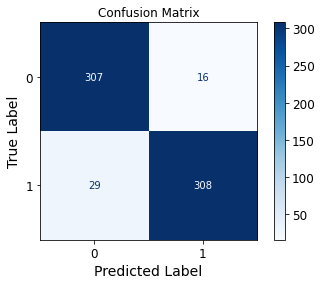

In [27]:
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



In [28]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.9318181818181818


In [29]:
#accuracy on train data 
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(training_data_accuracy)

1.0


In [30]:
# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.9506172839506173


In [31]:
# recall for training data predictions
recall_train = recall_score(y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 1.0


In [32]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.913946587537092


In [33]:
# F1 score for training data predictions
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 1.0


In [34]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.913946587537092


In [35]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

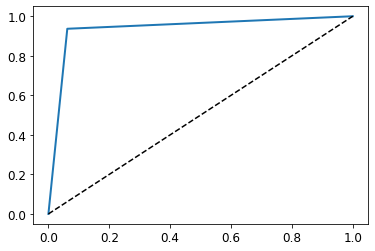

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

# LAB5 

| NB algorithm |	Accuracy |	TP |	FP |	TN |	FN |	Sensitivity |	Specificity |	Precision |	Recall |	Area Under ROC|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
MultinomialNB |	0.79 |	240 |	83 |	284	| 53 |	0.756 |	0.877 |	0.77 |	0.84 |	0.81 |
GuassianNB |	0.925 |	303 |	20 |	308 |	29 |	0.94 |	0.939 |	0.94 |	0.91 |	0.94 |
ComplementNB |	0.79 |	240 |	83 |	284 |	53 |	0.756 |	0.877 |	0.77 |	0.84 |	0.81 |
BernouilliNB |	0.50 |	174 |	149 |	156 |	181 |	0.48 |	0.52 |	0.51 |	0.46 |	0.50 |
CategoricalNB	| 0.557 |	178 |	145 |	190 |	147 |	0.48 |	0.52 |	0.56 |	0.53 |	0.50 |


Accuracy: 0.793939393939394
Cross Eval Score: [0.81879195 0.80536913 0.82511211]
Test Data Accuracy 0.793939393939394
Test data Precision = 0.773841961852861
Test data Recall = 0.8427299703264095
Test data F1 Score = 0.8427299703264095
Sensitivity:  0.7562776957163959
Specificity :  0.8778280542986425


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


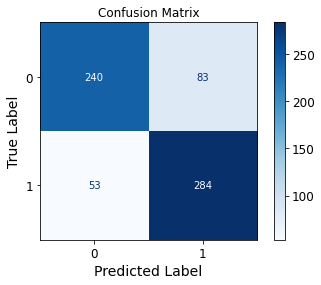

In [37]:
from sklearn.naive_bayes import MultinomialNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = MultinomialNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

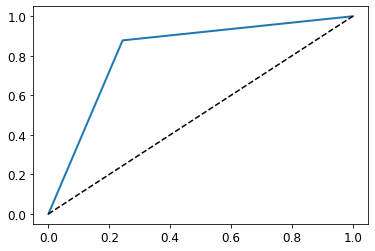

Area Under ROC: 0.8170528750075192


In [38]:
from sklearn.metrics import roc_curve
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))



Accuracy: 0.6212121212121212
Cross Eval Score: [0.63758389 0.62639821 0.60538117]
Test Data Accuracy 0.6212121212121212
Test data Precision = 0.6176470588235294
Test data Recall = 0.6363636363636364
Test data F1 Score = 0.6363636363636364
Sensitivity:  0.591044776119403
Specificity :  0.655223880597015


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


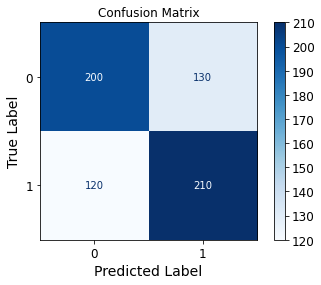

In [39]:
from sklearn.naive_bayes import MultinomialNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = MultinomialNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

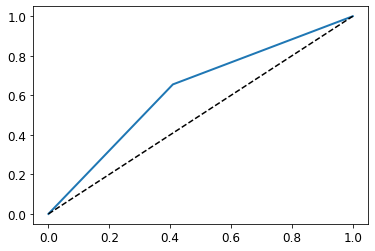

Area Under ROC: 0.623134328358209


In [40]:
from sklearn.metrics import roc_curve
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.48484848484848486
Cross Eval Score: [0.54362416 0.53243848 0.51569507]
Test Data Accuracy 0.48484848484848486
Test data Precision = 0.5105105105105106
Test data Recall = 0.4899135446685879
Test data F1 Score = 0.4899135446685879
Sensitivity:  0.5254730713245997
Specificity :  0.5359877488514548


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


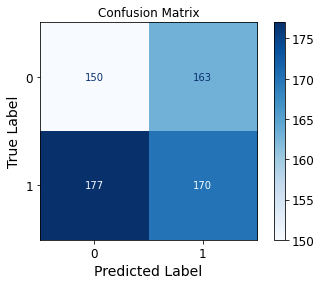

In [41]:
from sklearn.naive_bayes import MultinomialNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = MultinomialNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

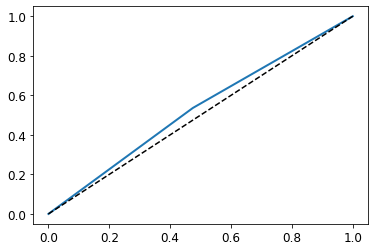

Area Under ROC: 0.5307304100880272


In [42]:
from sklearn.metrics import roc_curve
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.8196969696969697
Cross Eval Score: [0.83221477 0.84563758 0.81838565]
Test Data Accuracy 0.8196969696969697
Test data Precision = 0.9429223744292238
Test data Recall = 0.814595660749507
Test data F1 Score = 0.814595660749507
Sensitivity:  0.8097982708933718
Specificity :  0.8398791540785498


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


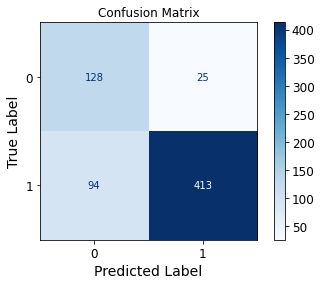

In [43]:
from sklearn.naive_bayes import MultinomialNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = MultinomialNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

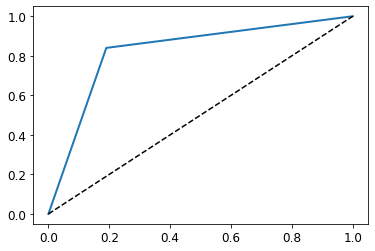

Area Under ROC: 0.8248387124859607


In [44]:
from sklearn.metrics import roc_curve
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


# Guassian Bayes

Accuracy: 0.9257575757575758
Cross Eval Score: [0.94407159 0.93288591 0.94394619]
Test Data Accuracy 0.9257575757575758
Test data Precision = 0.9390243902439024
Test data Recall = 0.913946587537092
Test data F1 Score = 0.913946587537092
Sensitivity:  0.9409158050221565
Specificity :  0.9396681749622926


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


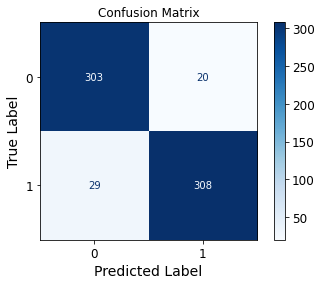

In [45]:
from sklearn.naive_bayes import GaussianNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = GaussianNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

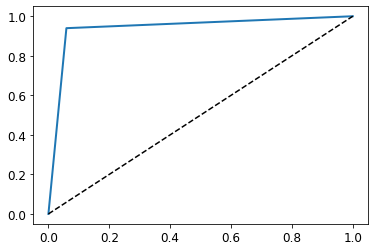

Area Under ROC: 0.9402919899922245


In [46]:
from sklearn.metrics import roc_curve
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.5984848484848485
Cross Eval Score: [0.64205817 0.6442953  0.64125561]
Test Data Accuracy 0.5984848484848485
Test data Precision = 0.5987841945288754
Test data Recall = 0.5969696969696969
Test data F1 Score = 0.5969696969696969
Sensitivity:  0.6462686567164179
Specificity :  0.6388059701492538


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


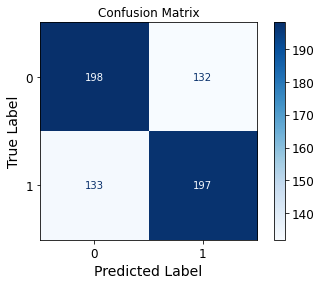

In [47]:
from sklearn.naive_bayes import GaussianNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = GaussianNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

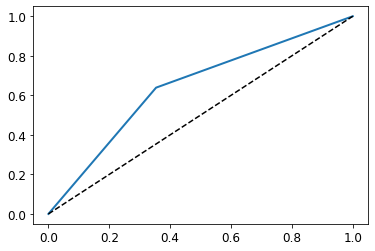

Area Under ROC: 0.6425373134328359


In [48]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.8227272727272728
Cross Eval Score: [0.76286353 0.81655481 0.80717489]
Test Data Accuracy 0.8227272727272728
Test data Precision = 0.8807947019867549
Test data Recall = 0.7665706051873199
Test data F1 Score = 0.7665706051873199
Sensitivity:  0.8486171761280932
Specificity :  0.7396630934150077


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


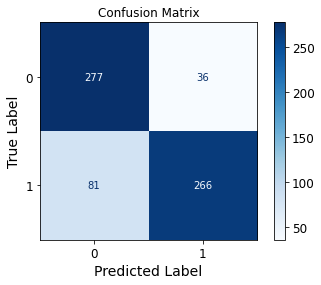

In [49]:
from sklearn.naive_bayes import GaussianNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = GaussianNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

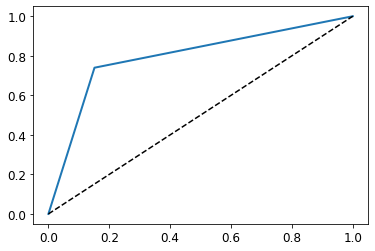

Area Under ROC: 0.7941401347715504


In [50]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.956060606060606
Cross Eval Score: [0.96420582 0.95525727 0.9529148 ]
Test Data Accuracy 0.956060606060606
Test data Precision = 0.978
Test data Recall = 0.9644970414201184
Test data F1 Score = 0.9644970414201184
Sensitivity:  0.930835734870317
Specificity :  0.9667673716012085


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


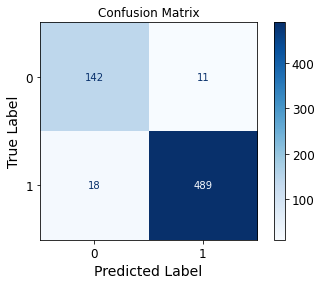

In [51]:
from sklearn.naive_bayes import GaussianNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = GaussianNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

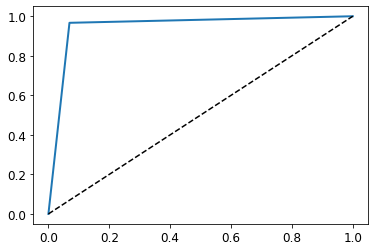

Area Under ROC: 0.9488015532357628


In [52]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.793939393939394
Cross Eval Score: [0.81879195 0.80536913 0.82511211]
Test Data Accuracy 0.793939393939394
Test data Precision = 0.773841961852861
Test data Recall = 0.8427299703264095
Test data F1 Score = 0.8427299703264095
Sensitivity:  0.7562776957163959
Specificity :  0.8778280542986425


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


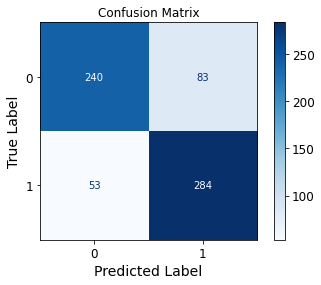

In [53]:
from sklearn.naive_bayes import ComplementNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = ComplementNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

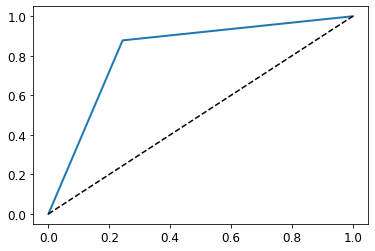

Area Under ROC: 0.8170528750075192


In [54]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))


Accuracy: 0.6212121212121212
Cross Eval Score: [0.63758389 0.62639821 0.60538117]
Test Data Accuracy 0.6212121212121212
Test data Precision = 0.6176470588235294
Test data Recall = 0.6363636363636364
Test data F1 Score = 0.6363636363636364
Sensitivity:  0.591044776119403
Specificity :  0.655223880597015


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


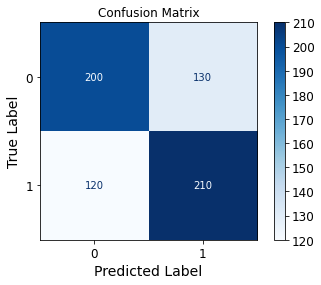

In [55]:
from sklearn.naive_bayes import ComplementNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = ComplementNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

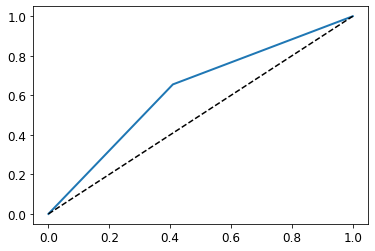

Area Under ROC: 0.623134328358209


In [56]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.48333333333333334
Cross Eval Score: [0.54362416 0.53243848 0.51569507]
Test Data Accuracy 0.48333333333333334
Test data Precision = 0.5089820359281437
Test data Recall = 0.4899135446685879
Test data F1 Score = 0.4899135446685879
Sensitivity:  0.5254730713245997
Specificity :  0.5359877488514548


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


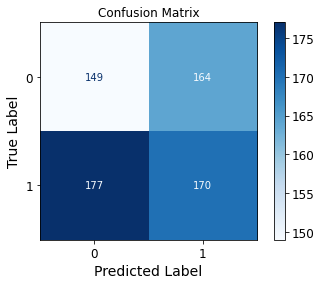

In [57]:
from sklearn.naive_bayes import ComplementNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = ComplementNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

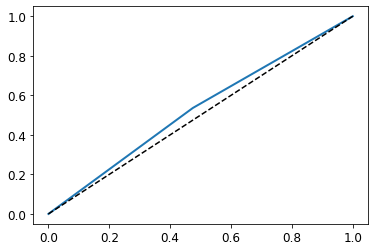

Area Under ROC: 0.5307304100880272


In [58]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.8196969696969697
Cross Eval Score: [0.83221477 0.84563758 0.81838565]
Test Data Accuracy 0.8196969696969697
Test data Precision = 0.9429223744292238
Test data Recall = 0.814595660749507
Test data F1 Score = 0.814595660749507
Sensitivity:  0.8097982708933718
Specificity :  0.8398791540785498


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


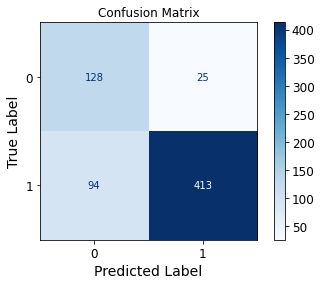

In [59]:
from sklearn.naive_bayes import ComplementNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = ComplementNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

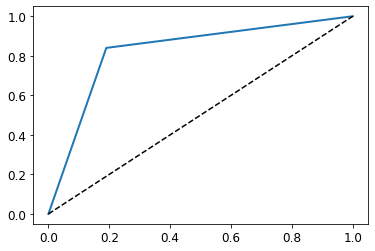

Area Under ROC: 0.8248387124859607


In [60]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.5
Cross Eval Score: [0.4966443  0.51230425 0.49103139]
Test Data Accuracy 0.5
Test data Precision = 0.5114754098360655
Test data Recall = 0.4629080118694362
Test data F1 Score = 0.4629080118694362
Sensitivity:  0.48005908419497784
Specificity :  0.5203619909502263


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


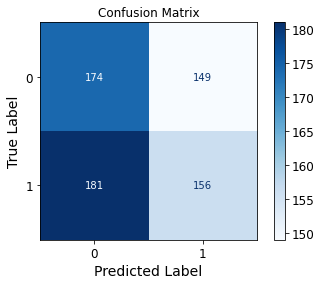

In [61]:
from sklearn.naive_bayes import BernoulliNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  BernoulliNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

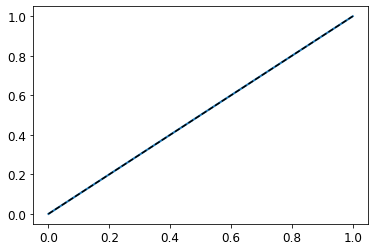

Area Under ROC: 0.500210537572602


In [62]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.503030303030303
Cross Eval Score: [0.43624161 0.48098434 0.4573991 ]
Test Data Accuracy 0.503030303030303
Test data Precision = 0.5025510204081632
Test data Recall = 0.5969696969696969
Test data F1 Score = 0.5969696969696969
Sensitivity:  0.41044776119402987
Specificity :  0.5059701492537313


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


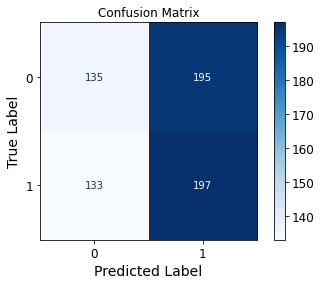

In [63]:
from sklearn.naive_bayes import BernoulliNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  BernoulliNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

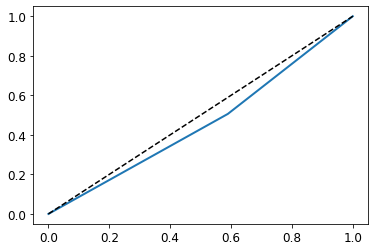

Area Under ROC: 0.45820895522388055


In [64]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.4984848484848485
Cross Eval Score: [0.50559284 0.48322148 0.51793722]
Test Data Accuracy 0.4984848484848485
Test data Precision = 0.5357142857142857
Test data Recall = 0.345821325648415
Test data F1 Score = 0.345821325648415
Sensitivity:  0.6142649199417758
Specificity :  0.38437978560490044


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


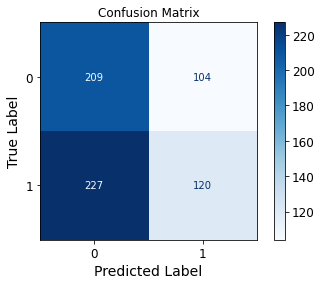

In [65]:
from sklearn.naive_bayes import BernoulliNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  BernoulliNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

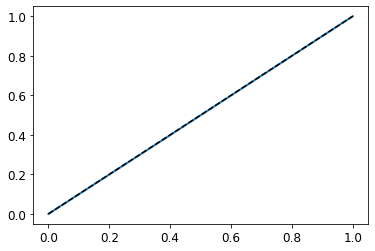

Area Under ROC: 0.4993223527733381


In [66]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.7681818181818182
Cross Eval Score: [0.74049217 0.74049217 0.73542601]
Test Data Accuracy 0.7681818181818182
Test data Precision = 0.7681818181818182
Test data Recall = 1.0
Test data F1 Score = 1.0
Sensitivity:  0.0
Specificity :  0.9969788519637462


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


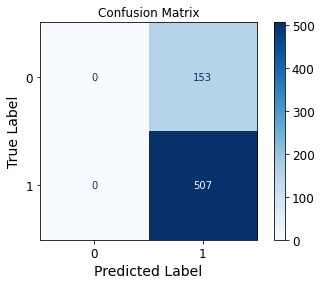

In [67]:
from sklearn.naive_bayes import BernoulliNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  BernoulliNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

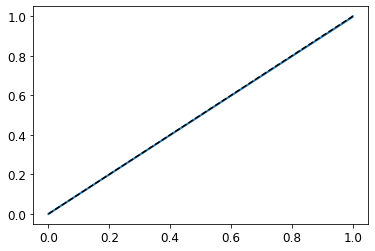

Area Under ROC: 0.4984894259818731


In [68]:
from sklearn.metrics import roc_curve

#df=original_dataset
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.5575757575757576
Test Data Accuracy 0.5575757575757576
Test data Precision = 0.5671641791044776
Test data Recall = 0.5637982195845698
Test data F1 Score = 0.5637982195845698
Sensitivity:  0.0014771048744460858
Specificity :  0.9969834087481146


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


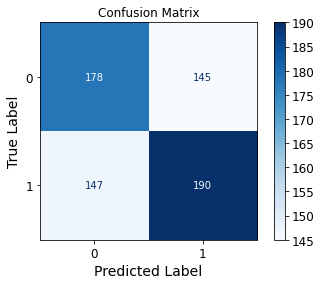

In [69]:
from sklearn.naive_bayes import CategoricalNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  CategoricalNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
#print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
#y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

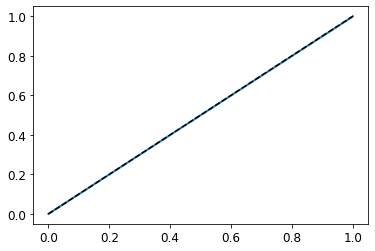

Area Under ROC: 0.49923025681128036


In [70]:
from sklearn.metrics import roc_curve

#df=original_dataset
#y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.5257575757575758
Test Data Accuracy 0.5257575757575758
Test data Precision = 0.5253731343283582
Test data Recall = 0.5333333333333333
Test data F1 Score = 0.5333333333333333
Sensitivity:  0.0014925373134328358
Specificity :  0.9970149253731343


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


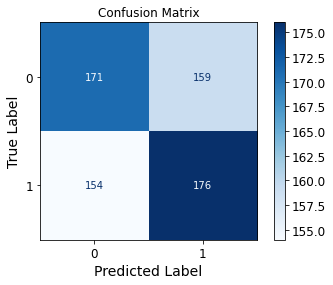

In [71]:
from sklearn.naive_bayes import CategoricalNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 2), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  CategoricalNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
#print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
#y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

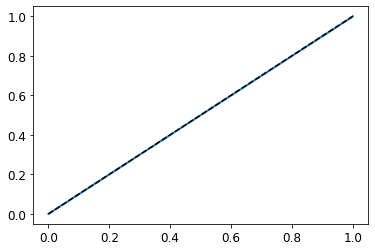

Area Under ROC: 0.49925373134328355


In [72]:
from sklearn.metrics import roc_curve

#df=original_dataset
#y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.5757575757575758
Test Data Accuracy 0.5757575757575758
Test data Precision = 0.6056782334384858
Test data Recall = 0.553314121037464
Test data F1 Score = 0.553314121037464
Sensitivity:  0.001455604075691412
Specificity :  0.996937212863706


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


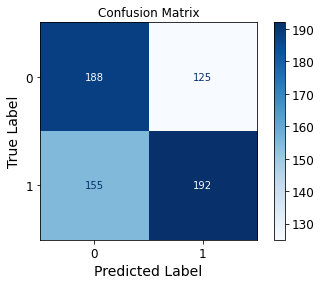

In [73]:
from sklearn.naive_bayes import CategoricalNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 3), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  CategoricalNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
#print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
#y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

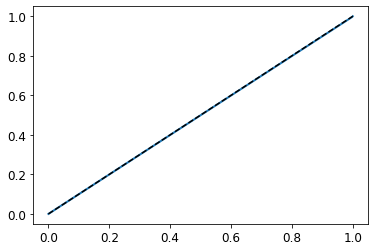

Area Under ROC: 0.4991964084696987


In [74]:
from sklearn.metrics import roc_curve

#df=original_dataset
#y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

Accuracy: 0.693939393939394
Test Data Accuracy 0.693939393939394
Test data Precision = 0.7850467289719626
Test data Recall = 0.8284023668639053
Test data F1 Score = 0.8284023668639053
Sensitivity:  0.0
Specificity :  0.9969788519637462


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


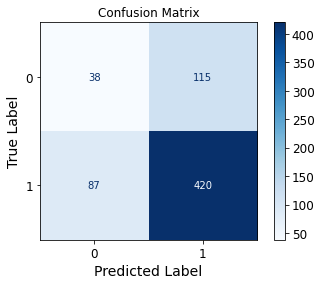

In [75]:
from sklearn.naive_bayes import CategoricalNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 4), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier =  CategoricalNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross validation score
#print("Cross Eval Score:", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))
#confusion matrix
#y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy",test_data_accuracy)

# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ",sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

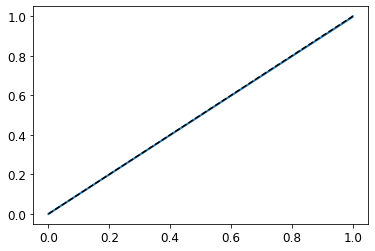

Area Under ROC: 0.4984894259818731


In [198]:
from sklearn.metrics import roc_curve

#df=original_dataset
#y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area Under ROC:",roc_auc_score(y_train, y_scores))

# Lab 7 Clustering

In [199]:
cluster=dataset.filter(['price_range','battery_power','px_width','px_height','touch_screen','n_cores','ram',])
cluster

,price_range,battery_power,px_width,px_height,touch_screen,n_cores,ram
0,1,842,756,20,0,2,2549
1,2,1021,1988,905,1,3,2631
2,2,563,1716,1263,1,5,2603
3,2,615,1786,1216,0,6,2769
4,1,1821,1212,1208,1,2,1411
...,...,...,...,...,...,...,...
1995,0,794,1890,1222,1,6,668
1996,2,1965,1965,915,1,4,2032
1997,3,1911,1632,868,1,8,3057
1998,0,1512,670,336,1,5,869


In [345]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [353]:
import pandas as pd
df  = pd.read_csv('/Users/HP/Desktop/train.csv')
df=df.drop(['price_range'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df)

print(X)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [354]:
X_centered=X-X.mean(axis=0)
U,s,Vt=np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]

In [355]:
W2=Vt.T[:,:2]
X2D=X_centered.dot(W2)

In [356]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)

In [357]:
from sklearn.cluster import KMeans

In [371]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X2D)

In [372]:
y_pred

array([4, 0, 0, ..., 2, 5, 0])

In [373]:
y_pred is kmeans.labels_

True

In [374]:
kmeans.cluster_centers_

array([[-0.51118202, -0.70828272],
       [ 0.27093904,  0.02624147],
       [-0.52367748, -0.01730452],
       [ 0.88728973, -0.68992005],
       [ 0.86454465,  0.70616167],
       [-0.54291536,  0.6870955 ],
       [ 0.2548067 ,  0.73411072],
       [ 0.87722258,  0.01949288],
       [ 0.28529337, -0.66595046]])

In [375]:
kmeans.labels_

array([4, 0, 0, ..., 2, 5, 0])

In [376]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X2D)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

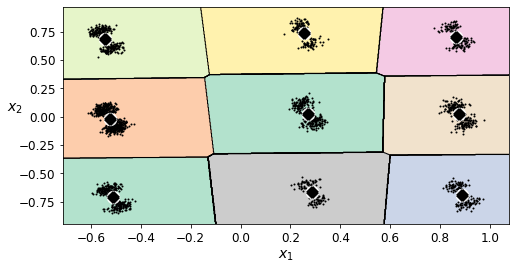

In [377]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X2D)
plt.show()

In [379]:
kmeans.transform(X_new)

array([[2.75610275, 1.99226773, 2.08416785, 2.83248177, 1.55610253,
        1.42073056, 1.29127926, 2.16608585, 2.68117216],
       [4.43432007, 3.36801075, 4.06027345, 3.42041146, 2.49683543,
        3.77835513, 3.02300545, 2.90320382, 3.80485531],
       [4.46604699, 4.42066534, 3.90337031, 5.35971375, 4.49404046,
        3.37443213, 3.96585689, 4.89042714, 4.92263601],
       [4.06045478, 4.10103932, 3.53114645, 5.02857946, 4.26058227,
        3.05350416, 3.70298955, 4.60280029, 4.56249875]])

In [382]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

ValueError: X has 2 features, but KMeans is expecting 20 features as input.

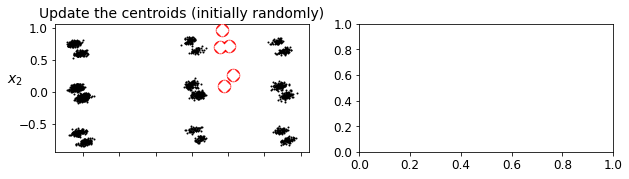

In [383]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X2D)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

ValueError: X has 2 features, but KMeans is expecting 20 features as input.

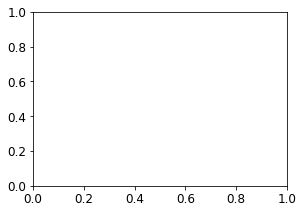

In [369]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()      

In [370]:
kmeans.inertia_

266.5687068724429

In [143]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [144]:
kmeans.score(X)

-211.5985372581684

In [145]:
kmeans_rnd_init1.inertia_

219.46374222419158

In [146]:
kmeans_rnd_init2.inertia_

211.5985372581684

In [147]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

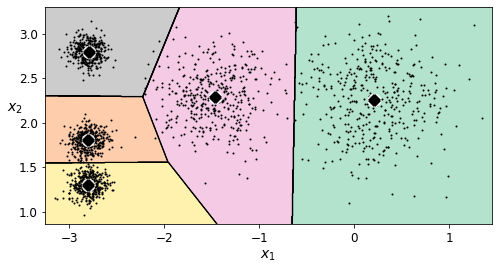

In [148]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

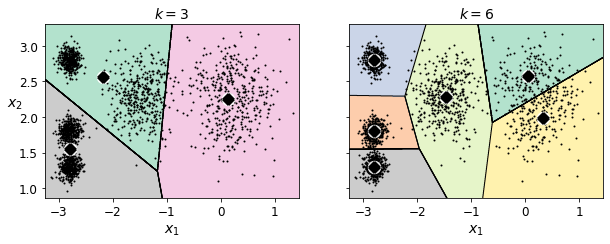

In [149]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k6 = KMeans(n_clusters=6, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k6, X, "$k=3$", "$k=6$")
plt.show()

In [150]:
kmeans_k3.inertia_

653.2167190021553

In [151]:
kmeans_k6.inertia_

169.23715382893542

In [152]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

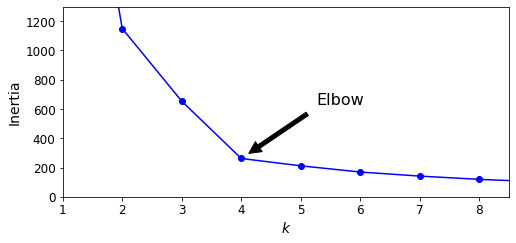

In [153]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

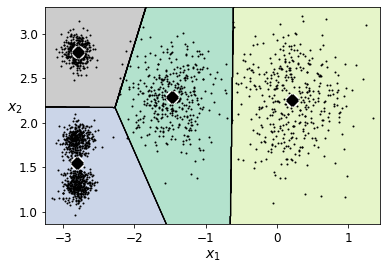

In [154]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [155]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [156]:
y_pred

array([1, 1, 2, ..., 3, 2, 1])

In [157]:
y_pred is kmeans.labels_

True

In [158]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80214068,  1.55162671],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063]])

In [159]:
kmeans.labels_

array([1, 1, 2, ..., 3, 2, 1])

In [160]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

In [161]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

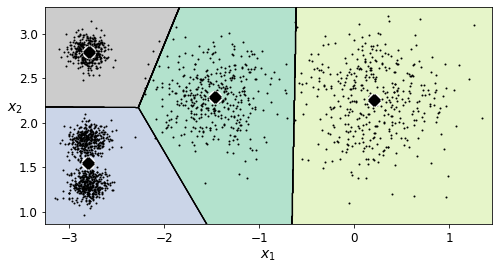

In [162]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [163]:
kmeans.transform(X_new)

array([[1.49439034, 2.83778629, 0.32995317, 2.9042344 ],
       [4.4759332 , 5.81943941, 2.80290755, 5.84739223],
       [1.69136631, 1.4618254 , 3.29399768, 0.29040966],
       [1.54808703, 0.96879317, 3.21806371, 0.36159148]])

In [164]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[1.49439034, 2.83778629, 0.32995317, 2.9042344 ],
       [4.4759332 , 5.81943941, 2.80290755, 5.84739223],
       [1.69136631, 1.4618254 , 3.29399768, 0.29040966],
       [1.54808703, 0.96879317, 3.21806371, 0.36159148]])

In [165]:
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=1)

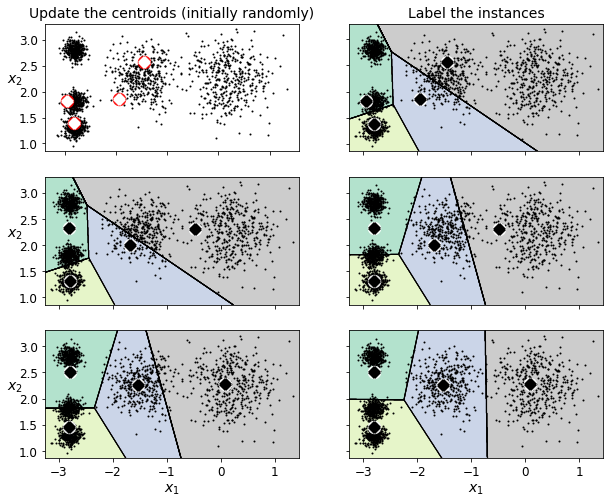

In [166]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [167]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

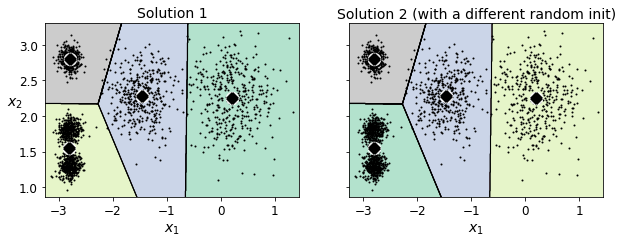

In [168]:
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

In [169]:
kmeans.inertia_

261.796777856947

In [170]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

261.7967778569473

In [171]:
kmeans.score(X)

-261.796777856947

In [172]:
kmeans_rnd_init1.inertia_

261.796777856947

In [173]:
kmeans_rnd_init2.inertia_

261.796777856947

In [174]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=4, random_state=11)

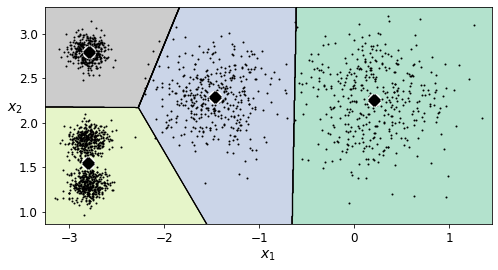

In [175]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

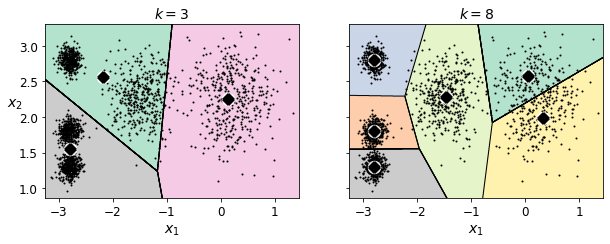

In [176]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k6 = KMeans(n_clusters=6, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k6, X, "$k=3$", "$k=8$")
plt.show()

In [177]:
kmeans_k3.inertia_

653.2167190021553

In [178]:
kmeans_k6.inertia_

169.23715382893545

In [179]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

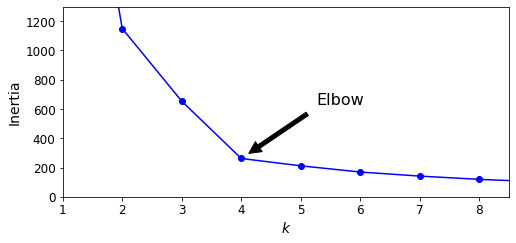

In [180]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

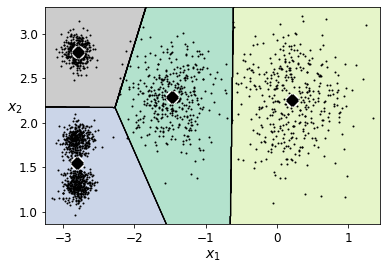

In [181]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [182]:
from sklearn.metrics import silhouette_score


In [183]:
silhouette_score(X, kmeans.labels_) #computes the overall silhouette score 


0.688531617595759

In [184]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]     # compute silhouette scores for different k


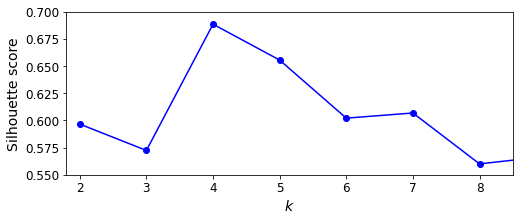

In [185]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5966442557582528
For n_clusters = 3 The average silhouette_score is : 0.5723900247411775
For n_clusters = 4 The average silhouette_score is : 0.688531617595759
For n_clusters = 5 The average silhouette_score is : 0.655517642572828
For n_clusters = 6 The average silhouette_score is : 0.6021101618281359


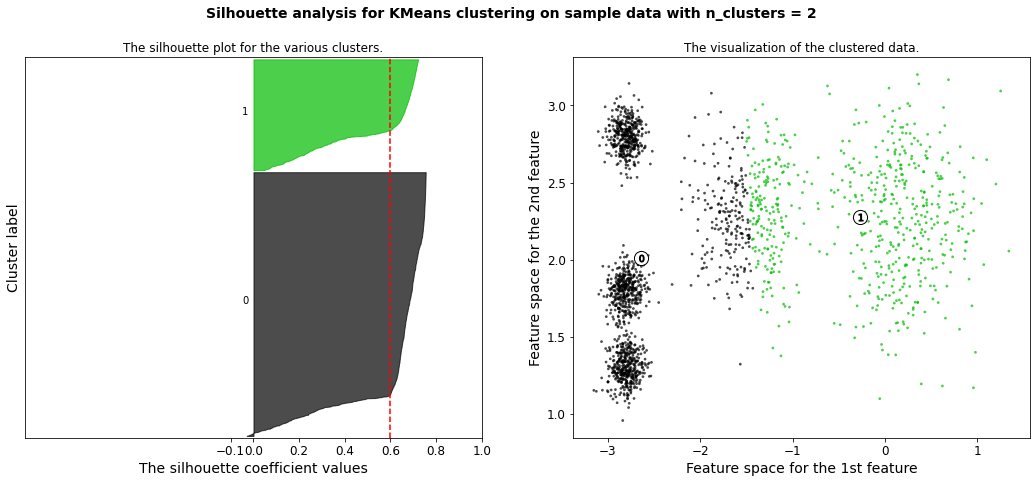

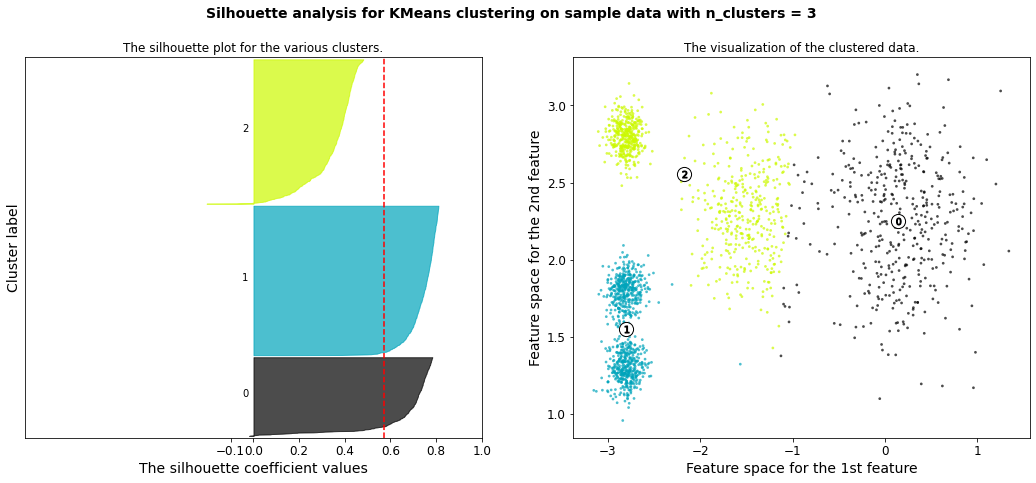

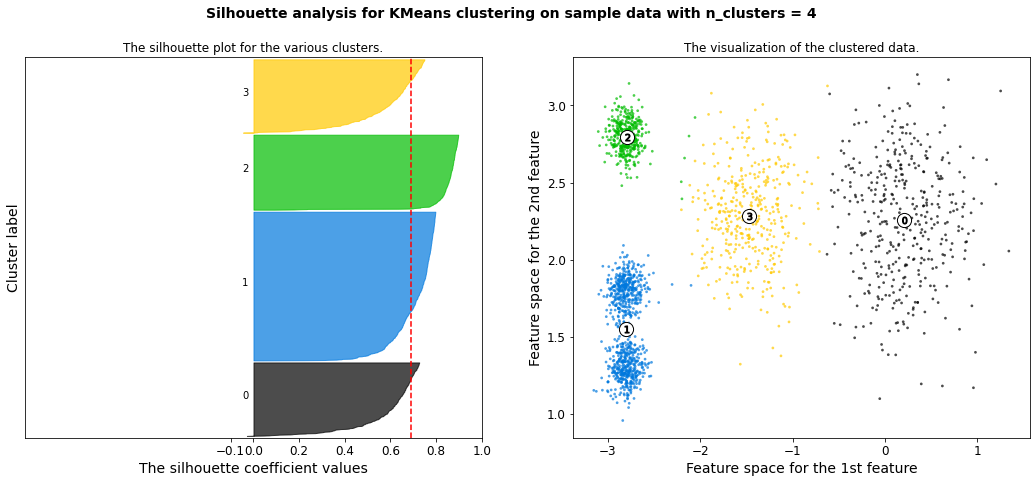

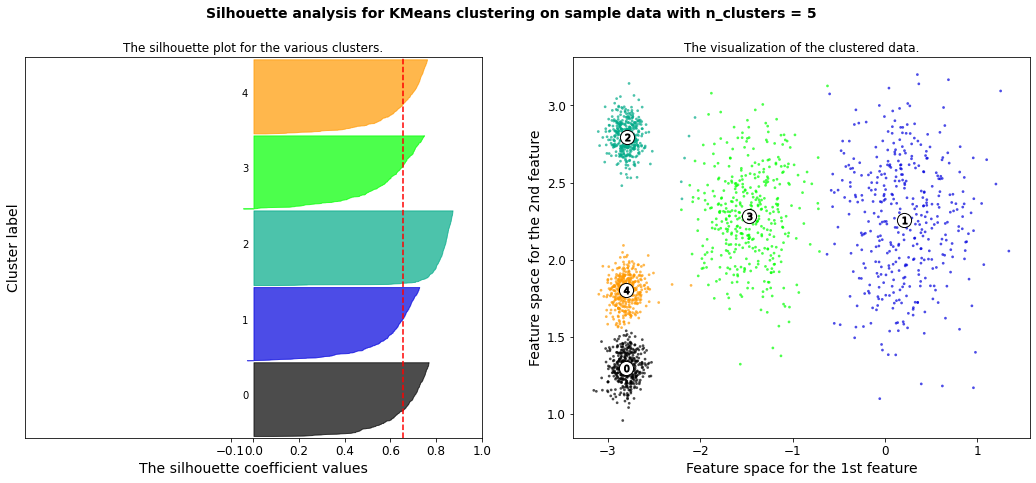

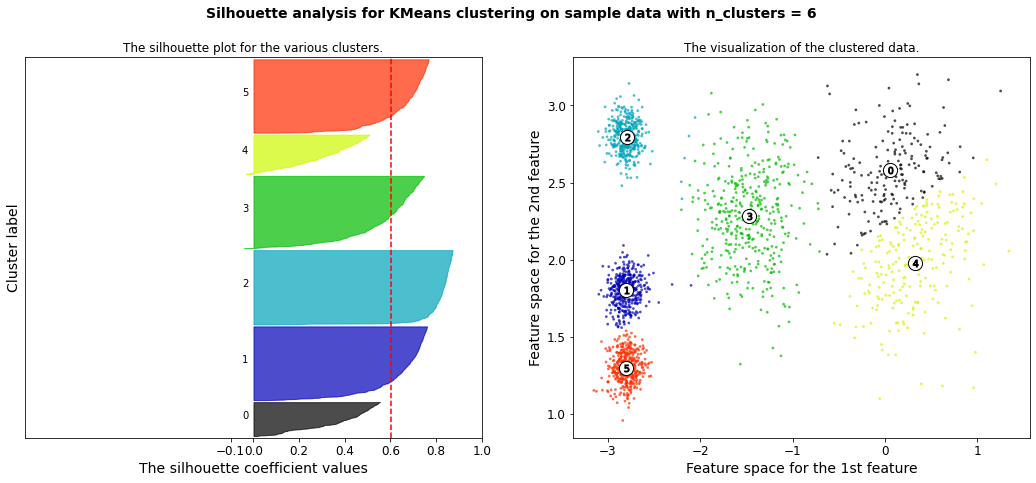

In [186]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [187]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [188]:
plot_clusters(X)

NameError: name 'plot_clusters' is not defined

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)


plt.show()